 Установка выбранной библиотеки на кластере.

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


Проверка корректности установки библиотеки. Разработка и запуск
тестового примера сети, соответствующей логистической регрессии, для
решения задачи классификации рукописных цифр набора данных MNIST

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Загрузка
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


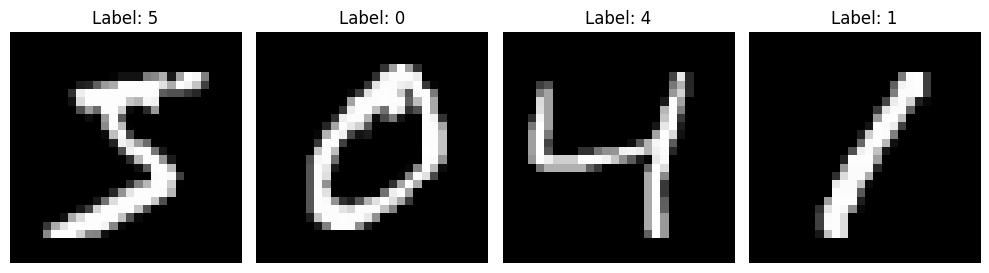

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Преобразование изображений из 28x28 в вектор 784
x_train = x_train.reshape(-1, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 784).astype(np.float32) / 255.0

# Преобразование меток в формат one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Гиперпараметры
learning_rate = 0.01
training_epochs = 10
batch_size = 100
num_batches = x_train.shape[0] // batch_size

In [ ]:
# Установка входов сети
x = tf.placeholder(tf.float32, [None, 784]) # разрешение 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 10 классов

# Установка весов сети
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Конструирование модели
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Определение функции ошибки
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# Определение метода оптимизации
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [ ]:
# Инициализация переменных (установка значений по умолчанию)
init = tf.global_variables_initializer()

# Обучение
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        avg_cost = 0

        # Случайно перемешиваем данные в начале каждой эпохи
        indices = np.arange(x_train.shape[0])
        np.random.shuffle(indices)
        x_train = x_train[indices]
        y_train = y_train[indices]

        for i in range(num_batches):
            start = i * batch_size
            end = start + batch_size
            batch_x = x_train[start:end]
            batch_y = y_train[start:end]
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / num_batches

        print(f"Epoch {epoch+1}, cost = {avg_cost:.4f}")

    # Оценка точности
    correct = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    print("Test accuracy:", sess.run(accuracy, feed_dict={x: x_test, y: y_test}))

Epoch 1, cost = 1.1463
Epoch 2, cost = 0.6420
Epoch 3, cost = 0.5357
Epoch 4, cost = 0.4846
Epoch 5, cost = 0.4532
Epoch 6, cost = 0.4314
Epoch 7, cost = 0.4153
Epoch 8, cost = 0.4026
Epoch 9, cost = 0.3924
Epoch 10, cost = 0.3838
Test accuracy: 0.9039


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import shutil

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Rescaling
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, Accuracy
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [ ]:
# Загрузка датасета
data = od.download(
    "https://www.kaggle.com/datasets/andrewmvd/doom-crossing/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:  indall
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/doom-crossing


100%|██████████| 997M/997M [00:07<00:00, 137MB/s] 


In [ ]:
BATCH_SIZE = 32
IMG_WIDTH = 64
IMG_HEIGHT = 64
IMG_CHANNELS = 3
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

doom_color = '#B9121B'
ac_color = '#3CAEA3'

initial_epochs = 5

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/doom-crossing', image_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=BATCH_SIZE)

# Нормализируем данные
data = data.map(lambda x, y: (x / 255, y))

Found 1597 files belonging to 2 classes.


In [ ]:
# Разделение на обучающую выборку, валидационную (используется)
train_size_percentage = 0.7
val_size_percentage = 0.2
test_size_percentage = 0.1

spared_batches = len(data) % 10

train_size = int(len(data) * train_size_percentage)
val_size = int(len(data) * val_size_percentage)
test_size = int(len(data) * test_size_percentage) + spared_batches


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
simple_model = Sequential([
    Rescaling(1./255, input_shape=IMG_SHAPE),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

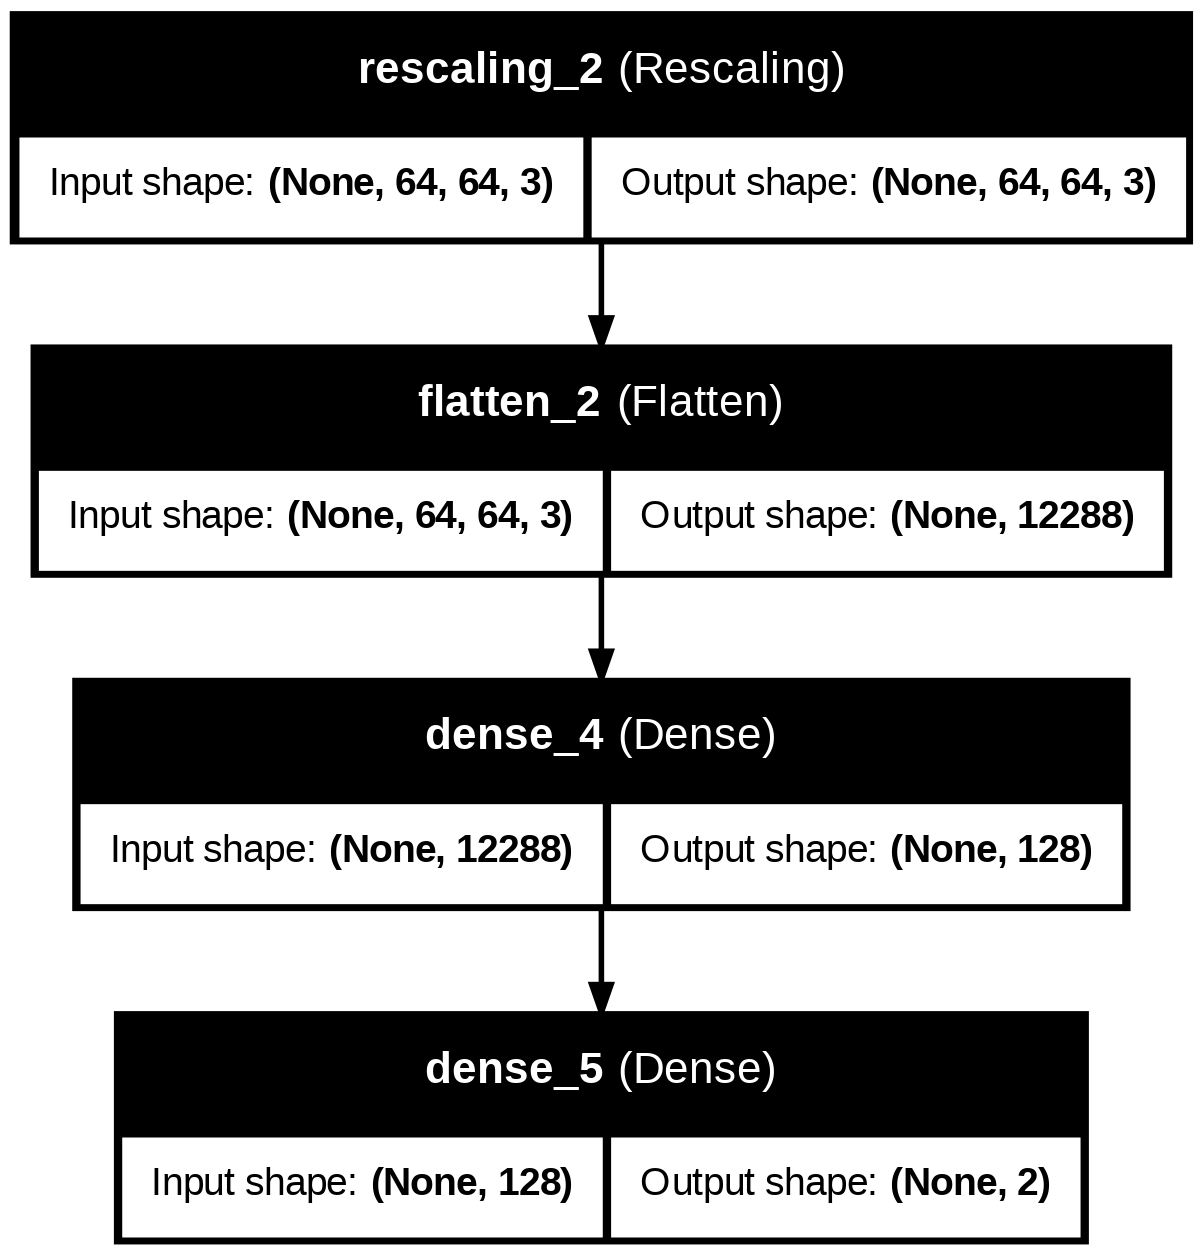

In [ ]:
plot_model(simple_model, to_file='simple_model.png', show_shapes=True, show_layer_names=True)
Image(filename='simple_model.png')

In [ ]:
# Сохраняем данные об обучении
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
def train_model(model, train, val, initial_epochs, callbacks):
    model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
      metrics=[
          tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall')
      ]
)

    hist = model.fit(train,
                     epochs=initial_epochs,
                     validation_data=val,
                     callbacks=[tensorboard_callback])

    # График функции потерь
    fig = plt.figure()
    plt.plot(hist.history['loss'], color=doom_color, label='loss')
    plt.plot(hist.history['val_loss'], color=ac_color, label='val_loss')
    fig.suptitle('Loss', fontsize=20)
    plt.legend(loc="upper left")
    plt.show()

    # График точности
    fig = plt.figure()
    plt.plot(hist.history['accuracy'], color=doom_color, label='accuracy')
    plt.plot(hist.history['val_accuracy'], color=ac_color, label='val_accuracy')
    fig.suptitle('Accuracy', fontsize=20)
    plt.legend(loc="upper left")
    plt.show()

def test_model(model, test):
    precision = Precision()
    recall = Recall()
    binary_accuracy = BinaryAccuracy()

    for batch in test.as_numpy_iterator():
        X, y = batch
        yhat = model.predict(X)

        precision.update_state(y, yhat)
        recall.update_state(y, yhat)
        binary_accuracy.update_state(y, yhat)

    print(f'Precision: {precision.result():.2f}, Recall: {recall.result():.2f}, Binary Accuracy: {binary_accuracy.result():.2f}')

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.6826 - loss: 0.6187 - precision: 0.7197 - recall: 0.6536 - val_accuracy: 0.7063 - val_loss: 0.6000 - val_precision: 0.6902 - val_recall: 0.7744
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7039 - loss: 0.6024 - precision: 0.7208 - recall: 0.7424 - val_accuracy: 0.6406 - val_loss: 0.6171 - val_precision: 0.6211 - val_recall: 0.8983
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.6853 - loss: 0.5935 - precision: 0.6813 - recall: 0.7916 - val_accuracy: 0.6844 - val_loss: 0.5784 - val_precision: 0.6438 - val_recall: 0.8598
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7065 - loss: 0.5798 - precision: 0.7232 - recall: 0.7539 - val_accuracy: 0.7250 - val_loss: 0.5631 - val_precision: 0.7112 - val_recall: 0.7964
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7188 - loss: 0.5744 - precision: 0.7288 - recall: 0.7631 - val_accuracy: 0.6844 - val_loss: 0.6072 - val_prec

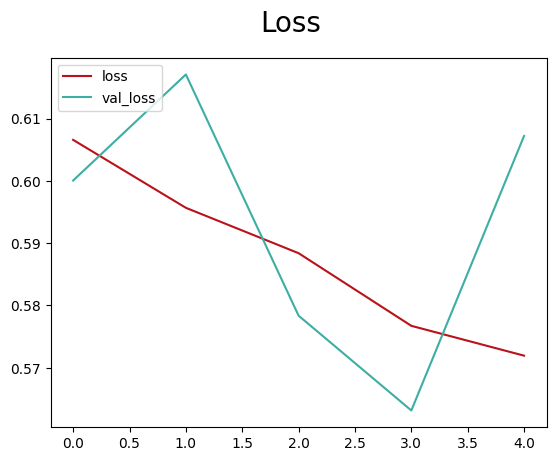

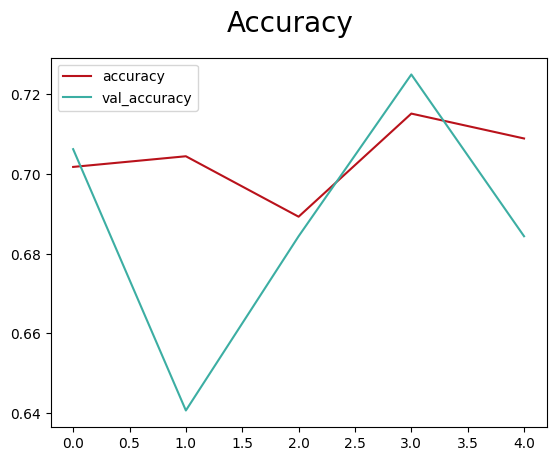

In [ ]:
train_model(simple_model, train, val, initial_epochs, [tensorboard_callback])

In [ ]:
test_model(simple_model, test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Precision: 0.77, Recall: 0.75, Binary Accuracy: 0.75


Другая архитектура

In [ ]:
better_model = Sequential([
    Rescaling(1./255, input_shape=IMG_SHAPE),
    # Разворачиваем изображение в вектор
    Flatten(),

    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

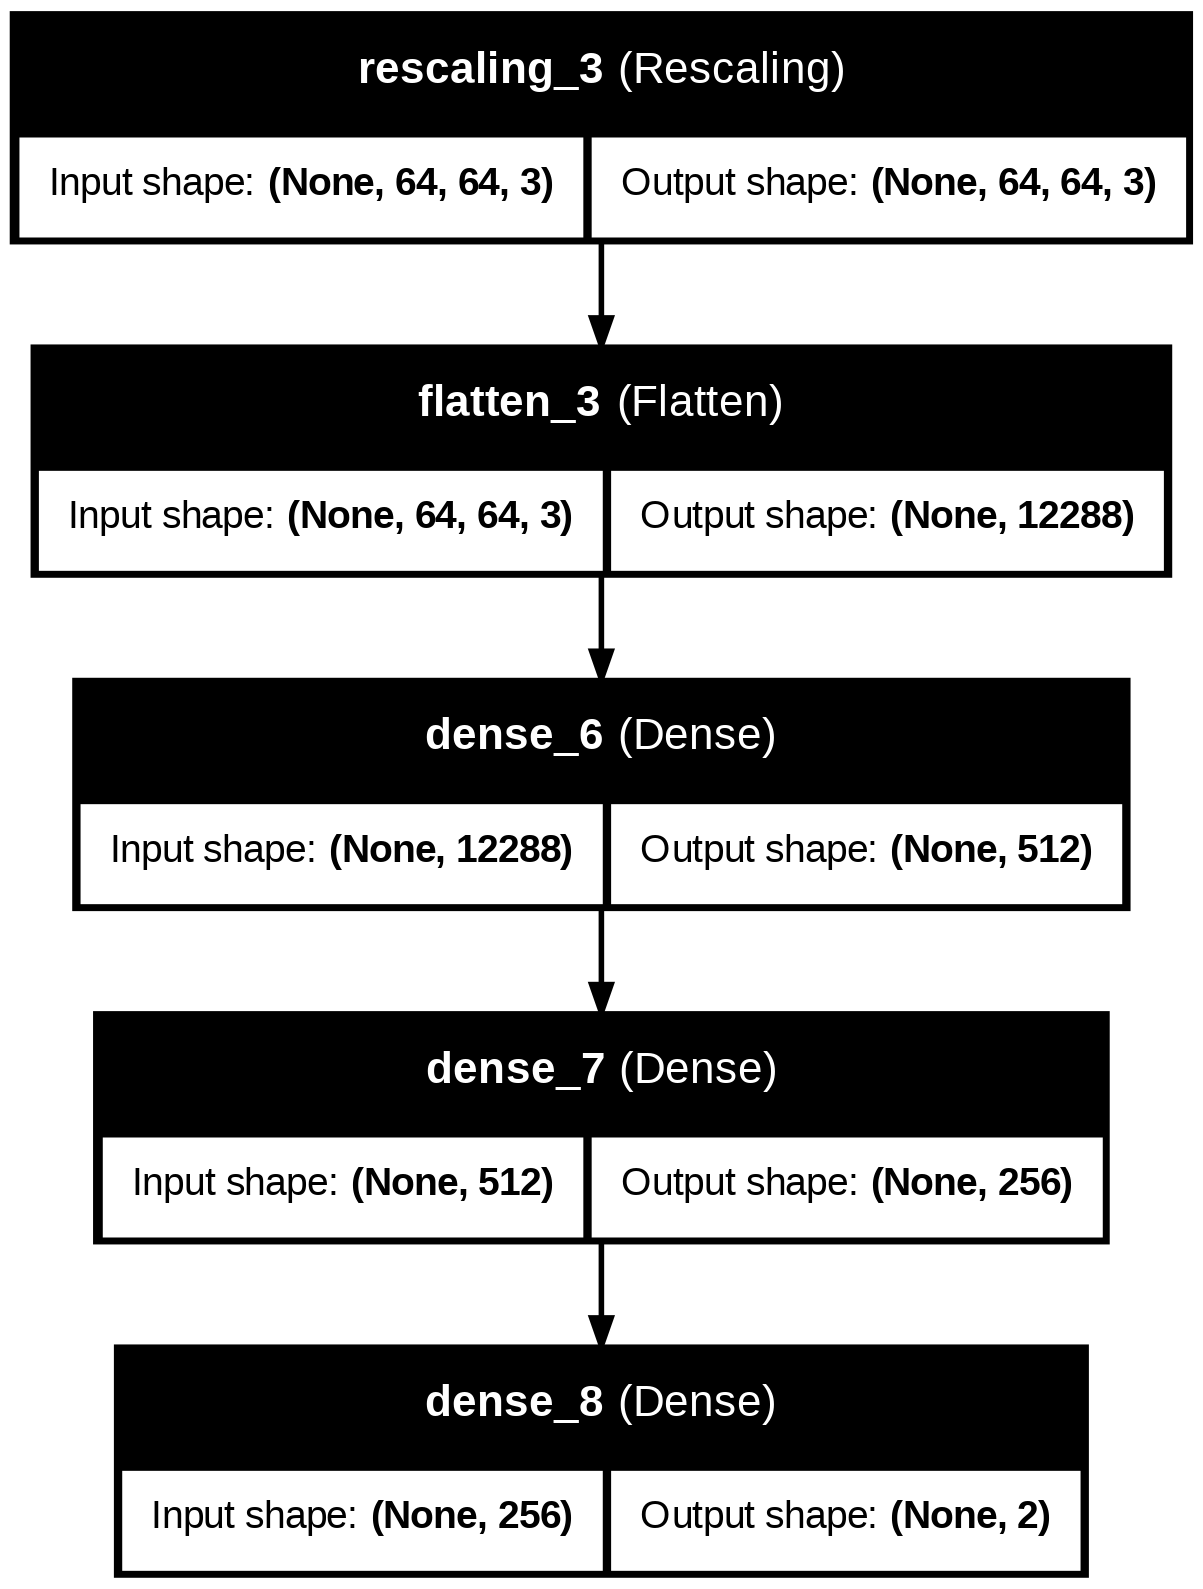

In [ ]:
plot_model(better_model, to_file='better_model.png', show_shapes=True, show_layer_names=True)
Image(filename='better_model.png')

In [ ]:
# Сохраняем данные об обучении
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6260 - loss: 0.6748 - precision: 0.6635 - recall: 0.6399 - val_accuracy: 0.5500 - val_loss: 0.6651 - val_precision: 0.5472 - val_recall: 0.9711
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6272 - loss: 0.6370 - precision: 0.6198 - recall: 0.8192 - val_accuracy: 0.6719 - val_loss: 0.5820 - val_precision: 0.6578 - val_recall: 0.7500
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6819 - loss: 0.5864 - precision: 0.7032 - recall: 0.7017 - val_accuracy: 0.6687 - val_loss: 0.5745 - val_precision: 0.7134 - val_recall: 0.6648
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6936 - loss: 0.5723 - precision: 0.7474 - recall: 0.6512 - val_accuracy: 0.6969 - val_loss: 0.5675 - val_precision: 0.6732 - val_recall: 0.8214
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6852 - loss: 0.5738 - precision: 0.7096 - recall: 0.7260 - val_accuracy: 0.7000 - val_loss: 0.5443 - val_prec

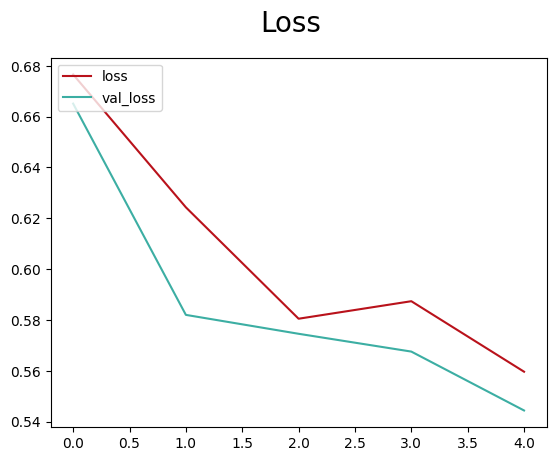

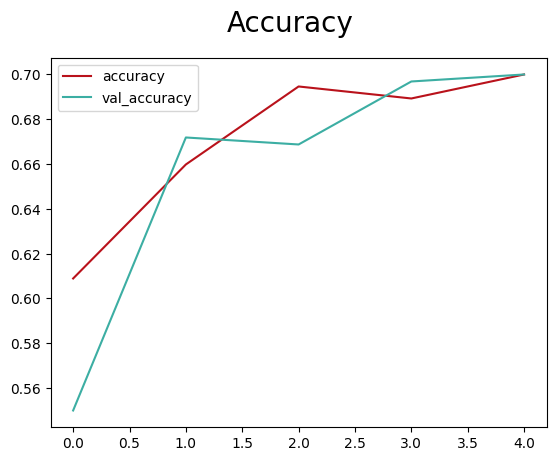

In [ ]:
train_model(better_model, train, val, initial_epochs, [tensorboard_callback])

In [ ]:
test_model(better_model, test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Precision: 0.72, Recall: 0.73, Binary Accuracy: 0.70


И ещё одна архитектура круче

In [ ]:
cool_model = Sequential([
    Rescaling(1./255, input_shape=IMG_SHAPE),
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.4),

    Dense(512, activation='relu'),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # 2 класса
])

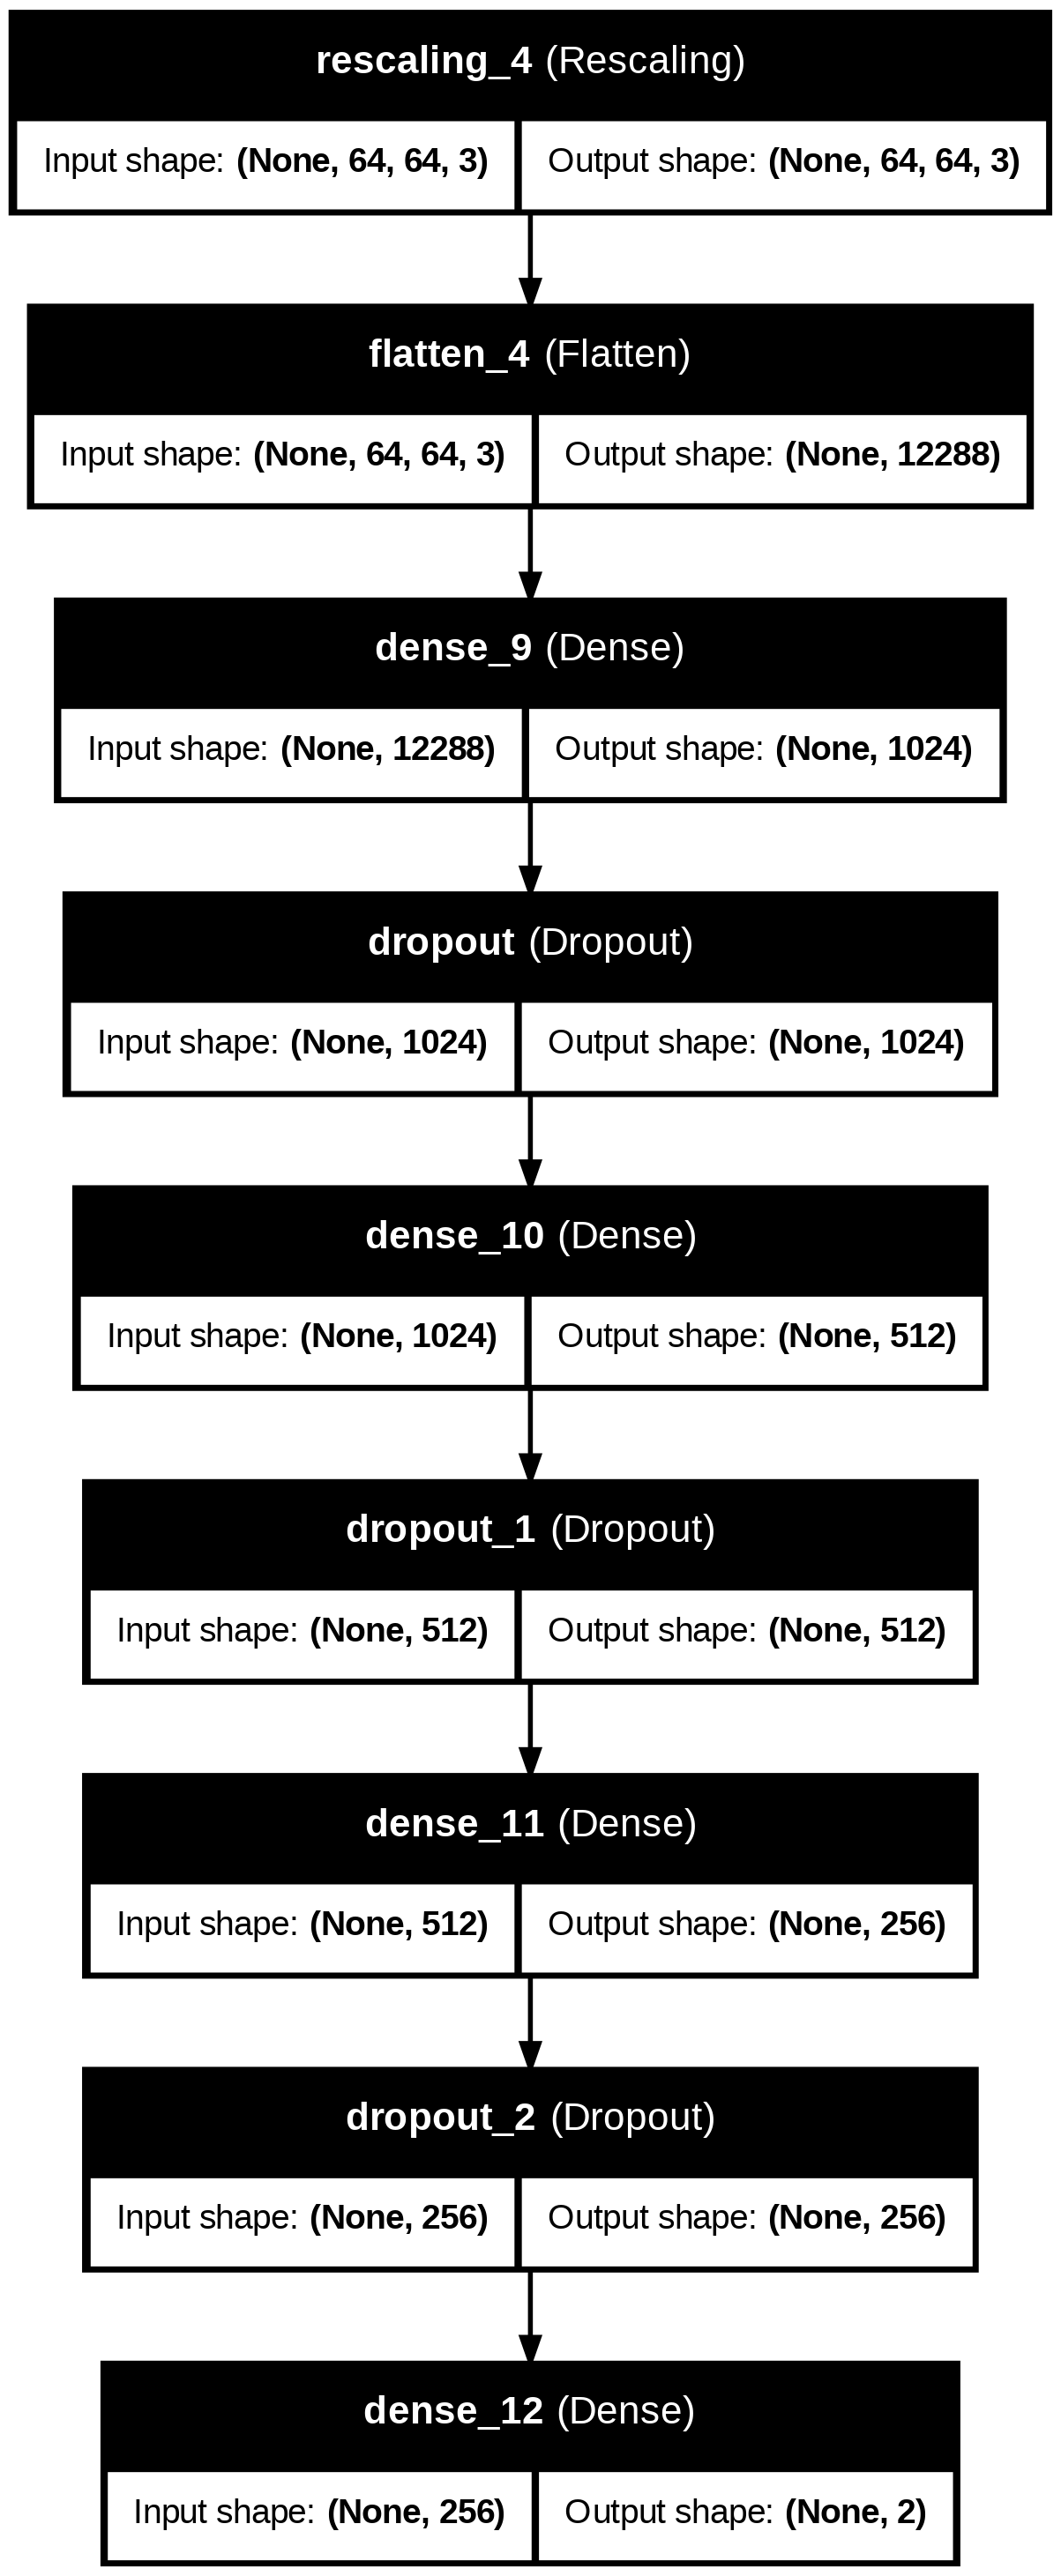

In [ ]:
plot_model(cool_model, to_file='cool_model.png', show_shapes=True, show_layer_names=True)
Image(filename='cool_model.png')

In [ ]:
# Сохраняем данные об обучении
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5297 - loss: 0.6934 - precision: 0.5589 - recall: 0.6820 - val_accuracy: 0.4781 - val_loss: 0.7047 - val_precision: 0.4781 - val_recall: 1.0000
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5903 - loss: 0.6788 - precision: 0.6225 - recall: 0.6467 - val_accuracy: 0.6781 - val_loss: 0.6244 - val_precision: 0.6704 - val_recall: 0.7317
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6366 - loss: 0.6507 - precision: 0.6539 - recall: 0.7295 - val_accuracy: 0.6938 - val_loss: 0.5822 - val_precision: 0.8250 - val_recall: 0.5625
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6483 - loss: 0.6186 - precision: 0.6929 - recall: 0.6621 - val_accuracy: 0.6969 - val_loss: 0.5732 - val_precision: 0.6798 - val_recall: 0.8118
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6820 - loss: 0.5999 - precision: 0.7247 - recall: 0.6549 - val_accuracy: 0.6844 - val_loss: 0.6175 - val_prec

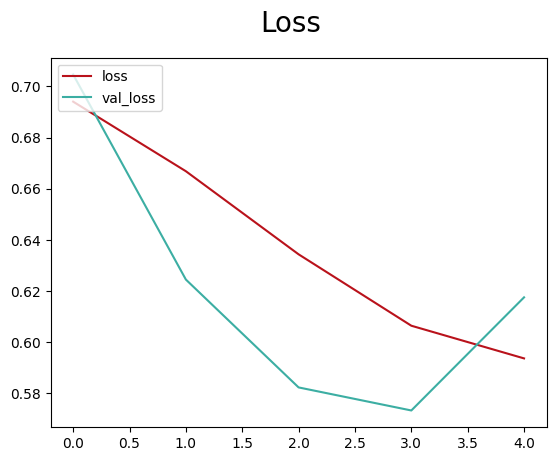

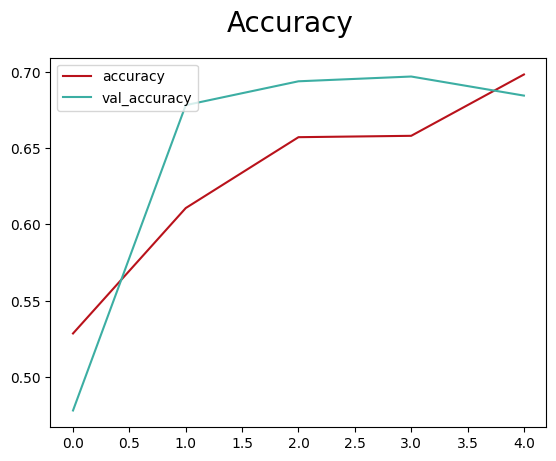

In [ ]:
train_model(cool_model, train, val, initial_epochs, [tensorboard_callback])

In [ ]:
test_model(cool_model, test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Precision: 0.84, Recall: 0.41, Binary Accuracy: 0.68
